<a href="https://colab.research.google.com/github/Bouchrikator/sic-/blob/main/check_point_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv("kc_house_data.csv")
df.head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**columns description and meaning:**

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but 
no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.shape

(21613, 21)

In [5]:
df.index

RangeIndex(start=0, stop=21613, step=1)

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


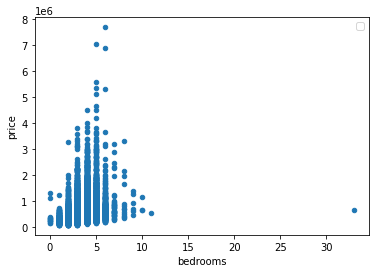

In [8]:
import matplotlib.pyplot as plt
df.plot.scatter(x='bedrooms', y='price')
plt.legend()
plt.show()

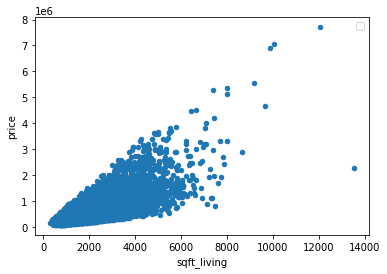

In [9]:
import matplotlib.pyplot as plt
df.plot.scatter(x='sqft_living', y='price')
plt.legend()
plt.show()

from what we see sqft living space has a high correation with house price but  there are some very big outliers here. These outlier can have an adverse effect on the accuracy of our model.

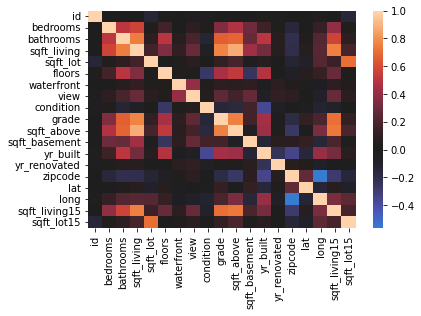

In [10]:
import seaborn as sns 
features = df.drop('price', axis=1)
sns.heatmap(features.corr(), center=0);

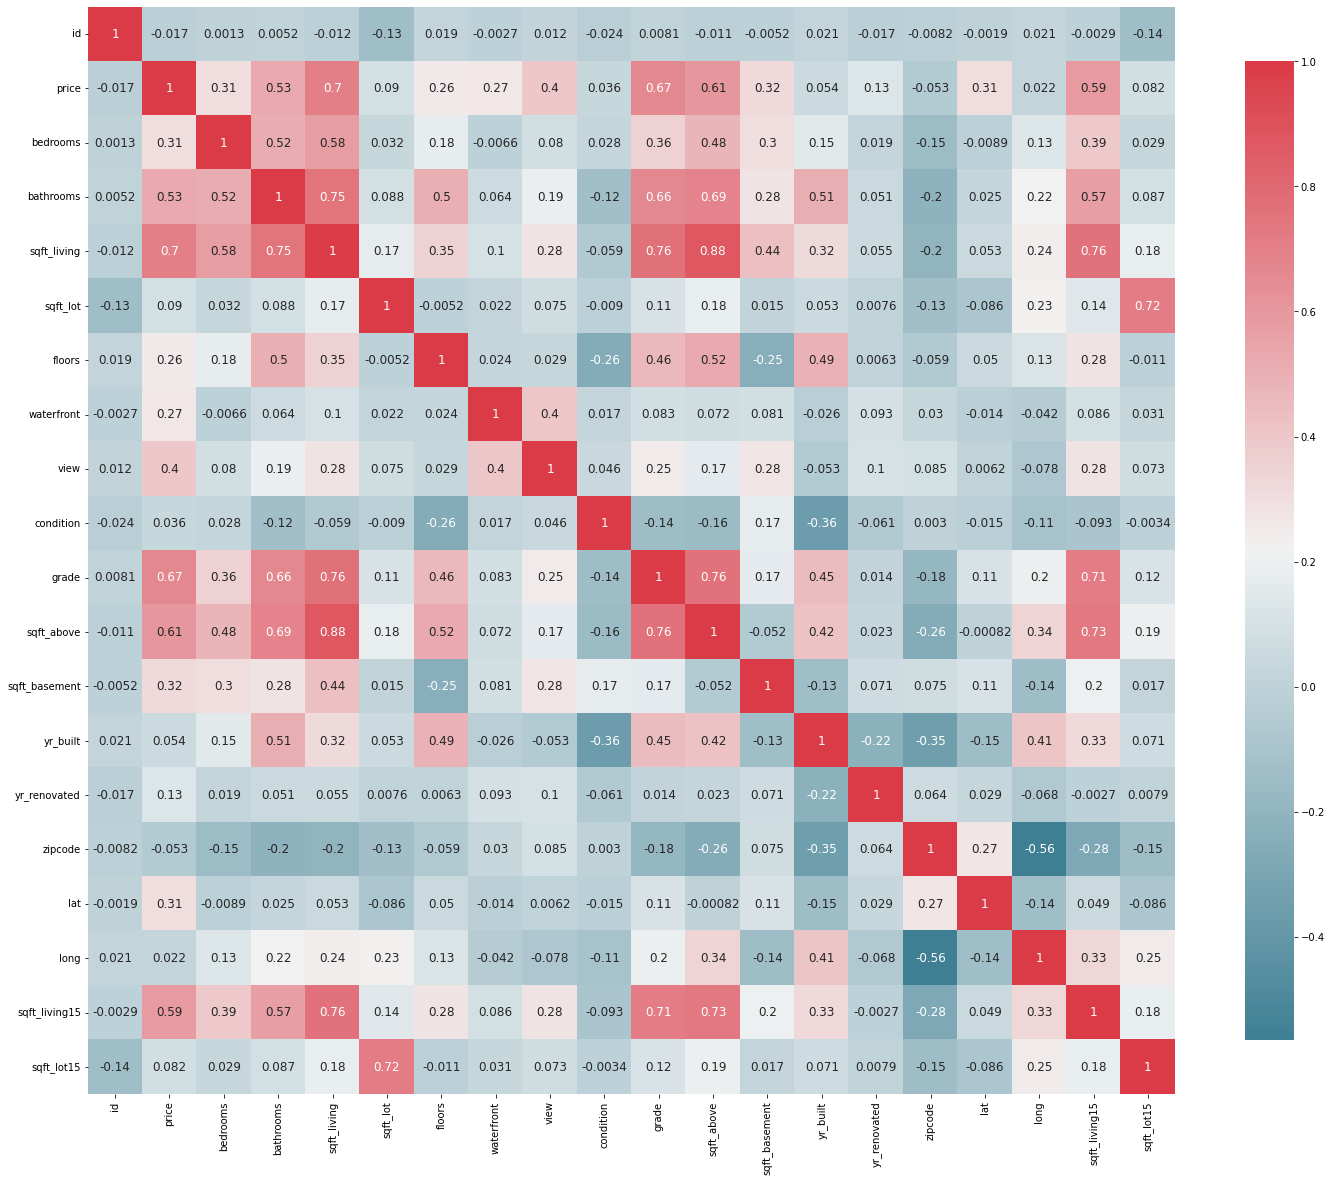

In [11]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 25 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

From the correlation heat map we can see that:

*   Price have a positive and strong correlation with 'sqft_lot15','sqft_living15','sqft_above','grade','sqft_living'
*   Price have a negativecorrelation with 'zipcode','id'



In [12]:
DF=df.drop(columns='price',inplace=True)

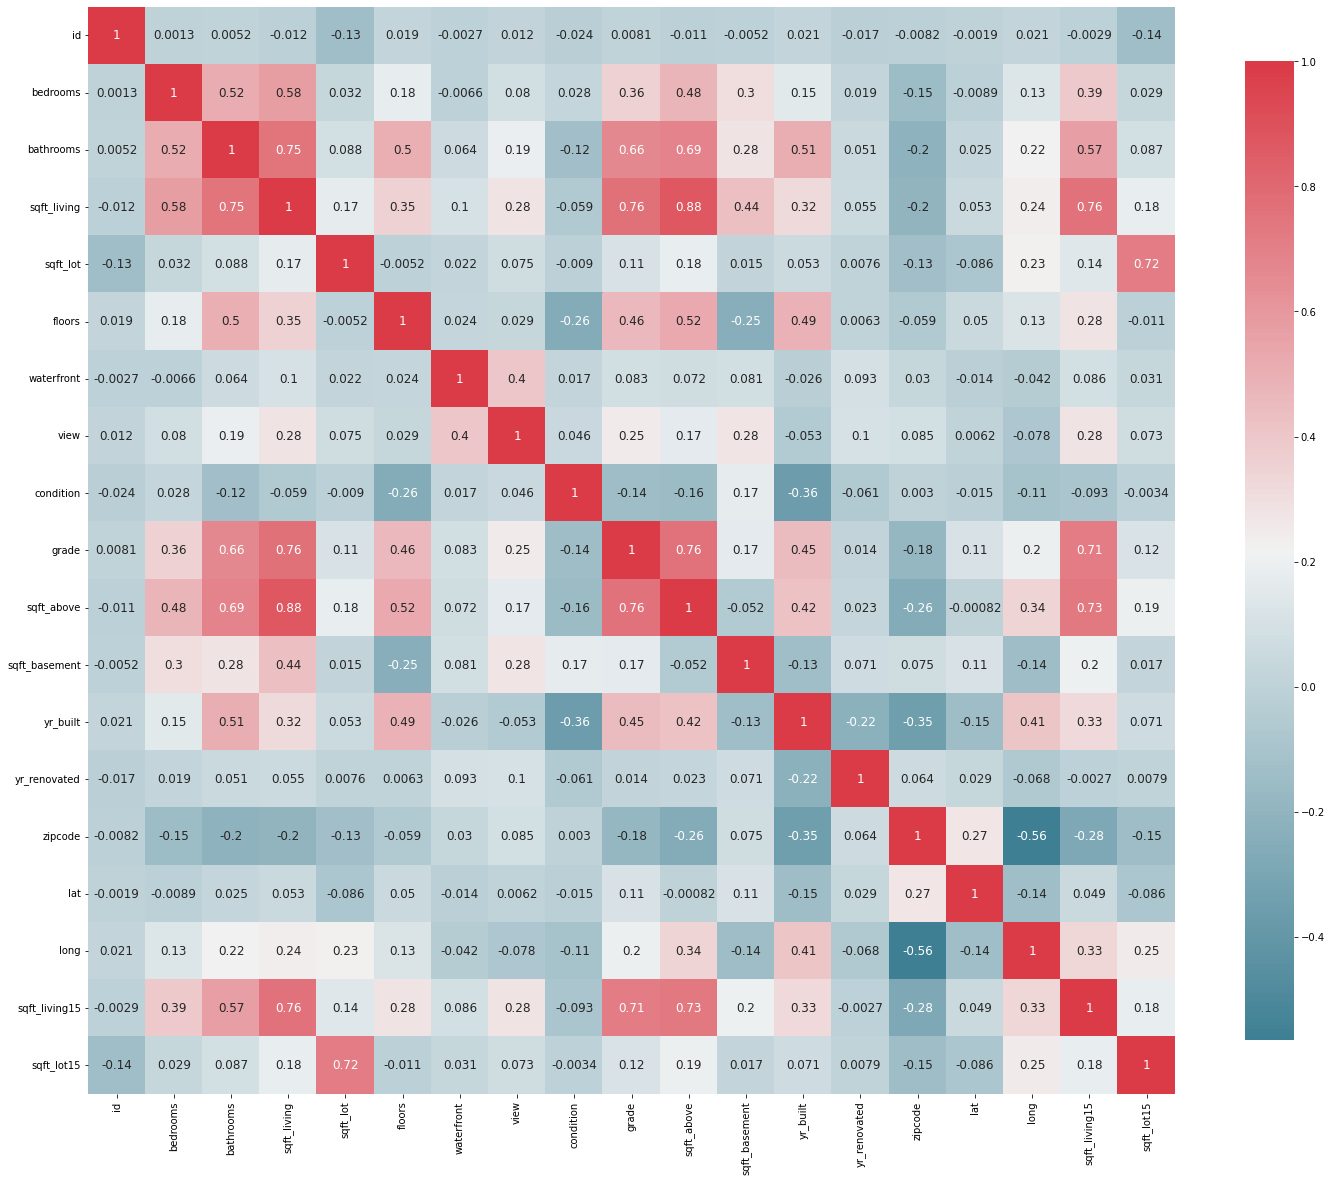

In [13]:

def plot_correlation_map( DF ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 25 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( DF )

In [14]:
df['sqft_living'].value_counts().head(50)

1300    138
1400    135
1440    133
1800    129
1660    129
1010    129
1820    128
1480    125
1720    125
1540    124
1560    124
1320    122
1250    120
1580    119
1370    118
1200    118
1650    117
1780    117
1900    117
1460    116
2100    116
1430    116
1680    116
1740    115
1510    114
1830    114
1340    113
1260    113
1640    112
1500    112
1240    112
1470    112
1610    112
2120    111
1690    110
1790    110
1960    110
1410    109
1670    109
1600    109
1530    109
1700    108
1980    105
2040    104
1760    104
1590    104
2020    104
2000    103
1520    102
1270    102
Name: sqft_living, dtype: int64

In [15]:
df=pd.read_csv("kc_house_data.csv")

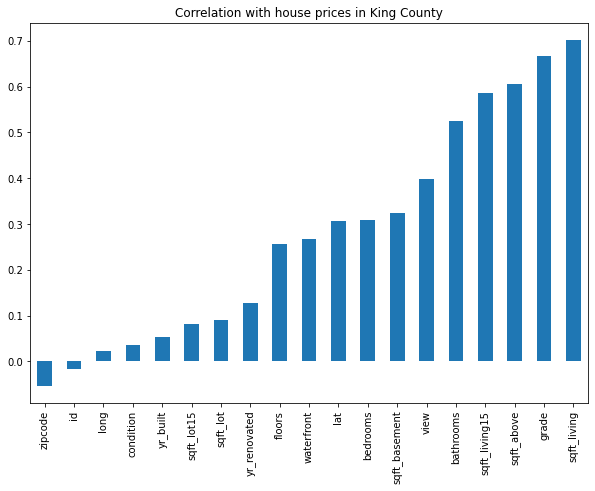

In [16]:
plt.figure(figsize=(10, 7))
df.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')

visualisation of the number of houses depending on bedrooms 

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Number of bedrooms'),
 Text(0.5, 1.0, 'Number of different houses depending on bedrooms')]

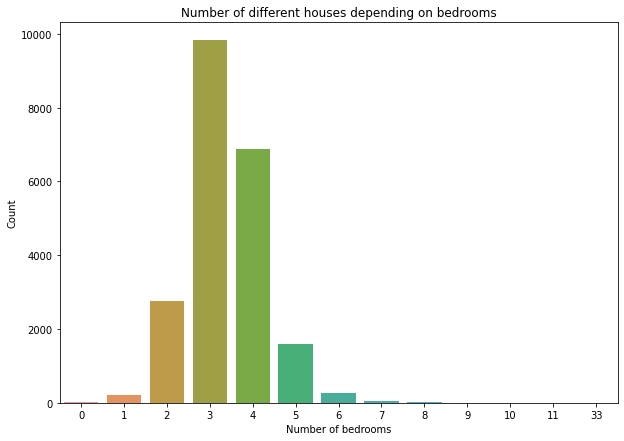

In [17]:
plt.figure(figsize=(10, 7))
sns.countplot(x='bedrooms', data=df).set(ylabel='Count', title='Number of different houses depending on bedrooms', xlabel='Number of bedrooms')

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Number of Bedrooms'),
 Text(0.5, 1.0, 'Comparison of House price and number of bedrooms')]

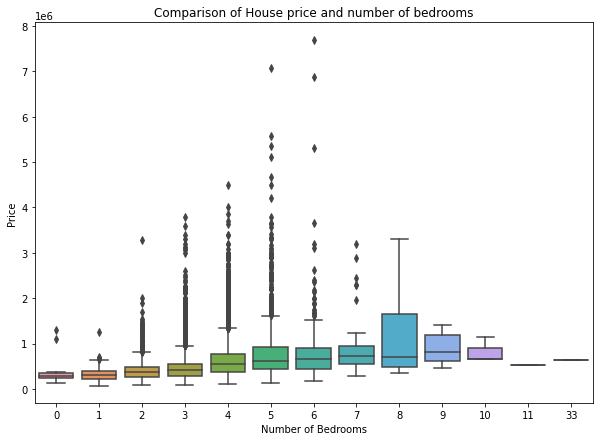

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='bedrooms', y='price', data=df).set(xlabel='Number of Bedrooms', ylabel='Price', title='Comparison of House price and number of bedrooms')

Number of bedrooms do not seem to have very high correalation to house price in King County. Most houses are priced below 1 million USD as mean values for all the boxes fall below this price.

waterfront houses 


[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Number of waterfront and non waterfront houses')]

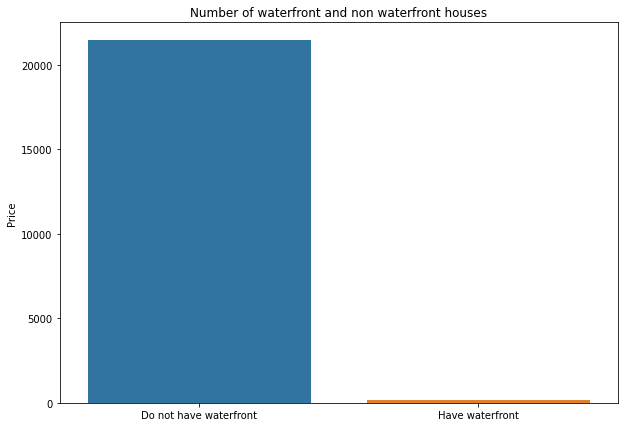

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(x='waterfront', data=df).set(xlabel='', ylabel='Price', title='Number of waterfront and non waterfront houses',
                                             xticklabels=['Do not have waterfront', 'Have waterfront'])

Houses that are waterfront properties do tend to have higher prices. But the number of waterfront properties in the sample with regards to non waterfront properties are very low.



# **Latitude and Logitude**

Lets see the map of King County, for reference:

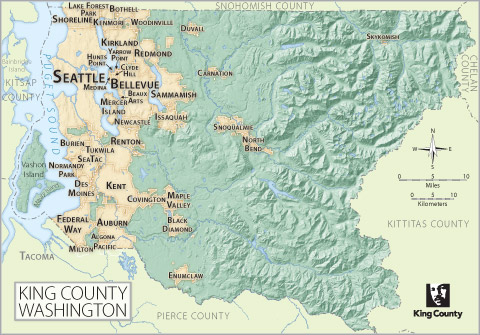

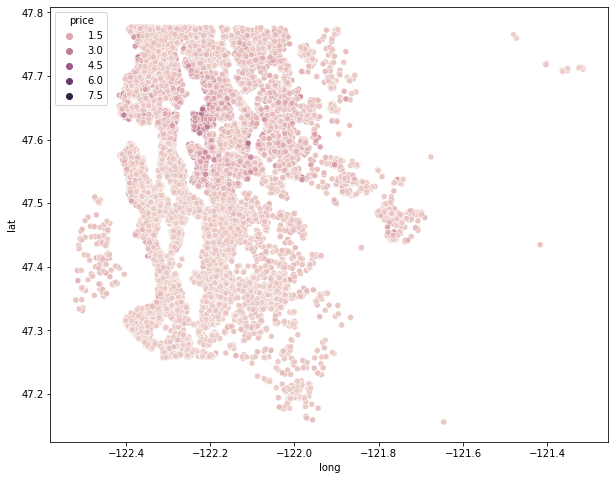

In [20]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

It seems that the prices are very well distributed among the counties. But there is a problem, if you look at the caption, the price is 3 million USD. We saw earlier that most homes are priced below 1 million. So let's see what percentage of homes are in the 3, 2.5, 2 and 1.5 million price range.

In [21]:
print('Percentage of houses priced below 3 million USD: ', len(df[df['price'] < 3000000]) / len(df) * 100)
print('Percentage of houses priced below 2.5 million USD: ', len(df[df['price'] < 2500000]) / len(df) * 100)
print('Percentage of houses priced below 2 million USD: ', len(df[df['price'] < 2000000]) / len(df) * 100)
print('Percentage of houses priced below 1.5 million USD: ', len(df[df['price'] < 1500000]) / len(df) * 100)

Percentage of houses priced below 3 million USD:  99.76865775227873
Percentage of houses priced below 2.5 million USD:  99.5280618146486
Percentage of houses priced below 2 million USD:  99.05149678434275
Percentage of houses priced below 1.5 million USD:  97.53389163929117


It seems if we put a cap on price at 2 million we will be losing just 1% of data. Lets see how adding this cap affects our latitude and longitude analysis

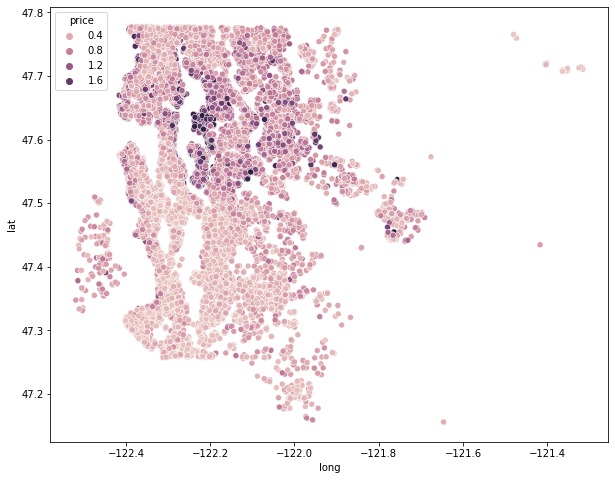

In [22]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=df[df['price'] < 2000000], hue='price')

If we refer to attached map, the high price areas correspond to urban areas in Seattle, Mercer Island and Bellevue.

As we can get the area related information from the combination of latitude and longitude, I believe zipcode can be dropped.

I am creating a categoreical column zone by splitting the map in 4 parts depending on latitude and longitude columns

In [23]:
df=pd.read_csv("kc_house_data.csv")

In [24]:
df.drop('zipcode', axis=1, inplace=True)


lat_mid = df['lat'].min() + ((df['lat'].max() - df['lat'].min()) / 2)
long_mid = df['long'].min() + ((df['long'].max() - df['long'].min()) / 2)
df['zone'] = df[['lat', 'long']].apply(
    lambda lat_long:
    1 if ((lat_long[0] < lat_mid) and (lat_long[1] < long_mid)) else (
        2 if ((lat_long[0] >= lat_mid) and (lat_long[1] < long_mid)) else (
            3 if ((lat_long[0] < lat_mid) and (lat_long[1] >= long_mid)) else 4
        )
    ),
    axis=1
)
houses = pd.concat([df.drop(['lat', 'long', 'zone'], axis=1), pd.get_dummies(df['zone'], drop_first=True)], axis =1)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,2,3,4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,1340,5650,1,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,1690,7639,1,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,2720,8062,1,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,1360,5000,1,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,1800,7503,1,0,0


# Date

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df['year_sold'] = df['date'].apply(lambda date: date.year)
df['month_sold'] = df['date'].apply(lambda date: date.month)

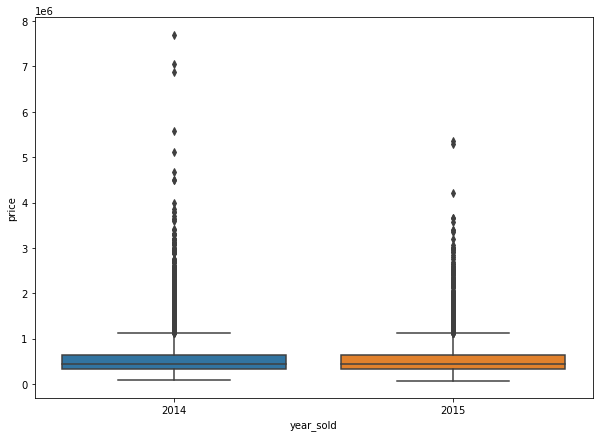

In [27]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='year_sold', y='price', data=df)

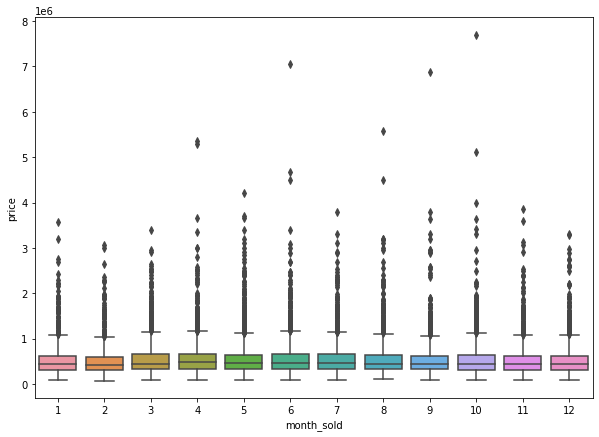

In [28]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='month_sold', y='price', data=df)

In [29]:
print('min: ', df['date'].min(), '\nmax: ',df['date'].max())

min:  2014-05-02 00:00:00 
max:  2015-05-27 00:00:00


Both year and month of sale seem to have no effect on the price of the house. It dose make sense to me as the data spans for just 13 months which is not a big enough window for fluctuations in house prices.

Since the date and it's extracted features do not have much effect on house price. I will drop them.

In [30]:
df.drop(['date', 'year_sold', 'month_sold'], axis=1, inplace=True)

ID

Id column is just a unique identifier and not a feature so I will drop it.



In [31]:
df.drop('id', axis=1, inplace=True)

Linear Regression

MSE 66630714602.5051
R squared 0.5093453299763637


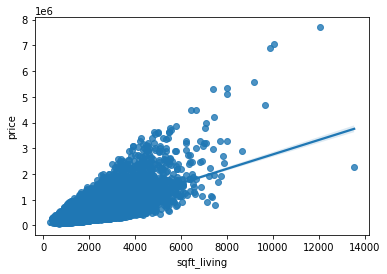

In [36]:
x=df[['sqft_living']]
y=df['price'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
from sklearn.linear_model import LinearRegression

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

y_pred = model.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", r2_score(y_test,predicted))

sns.regplot(x="sqft_living", y="price", data=df)

In [40]:
model.coef_

array([278.8251385])

In [41]:
model.intercept_

-40058.61522048793

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([11.22525673, 11.26447693, 11.28979441, ..., 15.74485584,
         15.7703098 , 15.85673102])),
 (0.5239049133783698, 13.0478193715726, 0.9945706227337197))

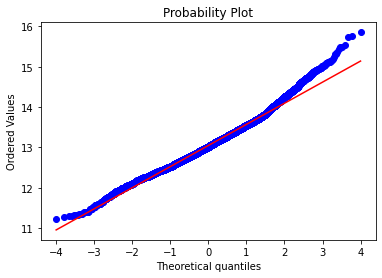

In [42]:
import scipy.stats as st
st.probplot(np.log1p(df.price),plot=plt)

Multilineare regression

In [32]:
X = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
Y_pred_train = lr_model.predict(X_train)
from sklearn.metrics import r2_score
print(r2_score(y_train,Y_pred_train))

0.6944681556675092


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset):
  vif=pd.DataFrame()
  vif["features"]=dataset.columns
  vif["vif_value"]=[variance_inflation_factor(dataset.values,i)for i in range (dataset.shape[1])]
  return(vif) 

In [44]:
DF=df.drop(columns="price")
calculate_vif(DF)


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_value
0,bedrooms,2.332322e+01
1,bathrooms,2.853708e+01
2,sqft_living,inf
3,sqft_lot,2.366626e+00
4,floors,1.682390e+01
5,waterfront,1.213902e+00
6,view,1.563971e+00
7,condition,3.478979e+01
8,grade,1.422303e+02
9,sqft_above,inf


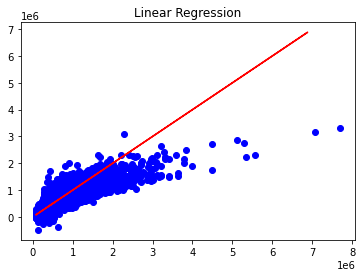

In [45]:
plt.scatter(y_train,Y_pred_train,color="b")
plt.title("Linear Regression")
plt.plot(y_test,y_test,color='red')
plt.show()


In [46]:
Y_pred = lr_model.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,Y_pred))

0.7077727921955328


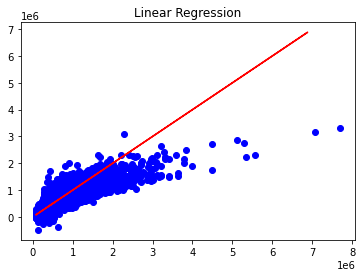

In [47]:
plt.scatter(y_train,Y_pred_train,color="b")
plt.title("Linear Regression")
plt.plot(y_test,y_test,color='red')
plt.show()


Polynomial regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures 
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", mean_squared_error(y_test, predicted))
print("R squared: ", r2_score(y_test,predicted))


MSE:  25966596009.88983
R squared:  0.8087874087367125


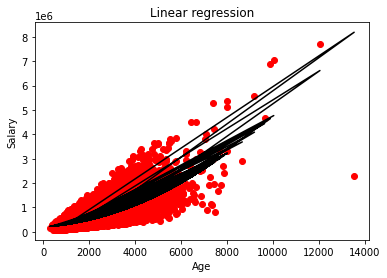

In [52]:
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 
